

# **Dataset acquisition and cleaning**



In [0]:
#import packages required
import pandas as pd
import numpy as np
from sklearn import linear_model
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

In [2]:
#open the data file as a dataframe
cvd=pd.read_csv('https://github.com/ArinB/CA05-B-Logistic-Regression/raw/master/cvd_data.csv')

#show the first several rows
cvd.head()

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,0,54,1,2,1,110.0,40.0,108.0,87.5,34.0,0,1,0,1,2,3,4
1,0,56,3,2,1,113.0,34.0,107.0,83.5,0.0,0,0,0,2,2,1,3
2,0,54,1,3,1,110.0,44.5,105.0,86.2,49.5,0,0,0,3,2,6,4
3,0,54,1,3,1,129.0,42.5,110.0,89.1,0.0,0,0,0,3,2,1,3
4,0,51,3,2,1,122.0,37.0,113.0,81.3,0.0,0,0,0,2,1,1,2


In [3]:
#Perform a Data Quality Analysis to find missing values, outliers, NaNs etc.
print(cvd.isnull().sum())
print(cvd.info())

cvd.describe()
#no missing values like NaN is dectected

cvd_4types      0
age_s1          0
race            0
educat          0
mstat           0
hip             0
neck20          0
waist           0
av_weight_kg    0
cgpkyr          0
tea15           0
srhype          0
parrptdiab      0
bend25          0
happy25         0
tired25         0
hlthlm25        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242 entries, 0 to 3241
Data columns (total 17 columns):
cvd_4types      3242 non-null int64
age_s1          3242 non-null int64
race            3242 non-null int64
educat          3242 non-null int64
mstat           3242 non-null int64
hip             3242 non-null float64
neck20          3242 non-null float64
waist           3242 non-null float64
av_weight_kg    3242 non-null float64
cgpkyr          3242 non-null float64
tea15           3242 non-null int64
srhype          3242 non-null int64
parrptdiab      3242 non-null int64
bend25          3242 non-null int64
happy25         3242 non-null int64
tired25         3242 non

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
count,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000
mean,0.590068,64.828809,1.094695,2.326342,1.368600,105.404832,37.550719,97.209904,82.945928,12.904010,0.430907,0.327884,0.067551,2.473782,2.281308,4.292721,3.864898
std,0.491897,10.400496,0.358237,0.697934,0.933871,10.280402,4.101003,13.598060,7.849650,20.156736,1.242444,0.469515,0.251012,0.672158,0.951695,1.021099,0.614247
min,0.000000,39.000000,1.000000,1.000000,1.000000,44.000000,25.000000,67.000000,57.400000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,57.000000,1.000000,2.000000,1.000000,99.000000,34.425000,88.000000,78.200000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,4.000000,4.000000
50%,1.000000,65.000000,1.000000,2.000000,1.000000,104.000000,37.150000,97.000000,82.550000,0.300000,0.000000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
75%,1.000000,73.000000,1.000000,3.000000,1.000000,110.000000,40.500000,106.000000,86.575000,20.475000,0.000000,1.000000,0.000000,3.000000,3.000000,5.000000,4.000000
max,1.000000,90.000000,3.000000,4.000000,8.000000,168.000000,53.000000,135.000000,136.700000,170.500000,30.000000,1.000000,1.000000,3.000000,6.000000,6.000000,5.000000


# **Models trial**

In [0]:
#set up random seed
import random
random.seed(99)

#selecting independant and dependant variables
y = cvd['cvd_4types']
X = cvd.drop('cvd_4types',axis=1)

#splitting the train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=99)


In [5]:
#not an exteme big or small dataset, try with the newton-cg method, which only supports L2 penalty or nothing

clf_1=linear_model.LogisticRegression(solver='newton-cg',random_state=99, penalty='l2')
model_1=clf_1.fit(X_train,y_train)

#evaluate model performance with accuracy and AUC
y_pred=model_1.predict(X_test)

accuracy=np.mean(y_test==y_pred)
print('Accuracy score is ',accuracy)

y_pred_prob = clf_1.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_prob)
roc_auc = metrics.auc(fpr, tpr)
print('AUC score is ',roc_auc)


Accuracy score is  0.6990654205607477
AUC score is  0.7200227383933455


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_m

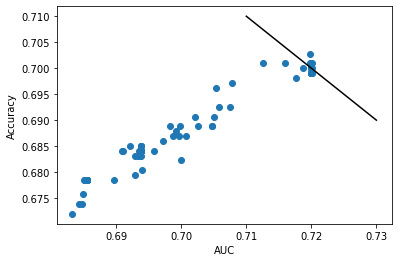

In [6]:
#try models by groups of penalty from now
#choose a best model for each penalty method and compare them to get the best model


#Part A
#try with L2 penalty, ‘liblinear’ and ‘saga’
#tune and try C values with logspace method

solver_list=['newton-cg', 'lbfgs', 'sag', 'saga']
c_range=np.logspace(-2,2,20)
c_temp=[]
solver_temp=[]
accuracy_temp=[]
auc_temp=[]
index_temp=[]

for c in c_range:
  for solver in solver_list:
    clf_2=linear_model.LogisticRegression(solver=solver,penalty='l2',random_state=99,C=c)
    model_2=clf_2.fit(X_train,y_train) #fit the model

    #predict
    y_pred=model_2.predict(X_test)
    y_pred_prob = clf_2.predict_proba(X_test)[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_prob)

    #evaluate model performance with accuracy and AUC
    accuracy_temp.append(np.mean(y_test==y_pred))
    auc_temp.append(metrics.auc(fpr, tpr))
    c_temp.append(c)
    solver_temp.append(solver)
    index_temp.append((c,solver))

#building a dataframe
data_l2={'C':c_temp,'Solver':solver_temp,'Accuracy':accuracy_temp,'AUC':auc_temp}
l2_method=pd.DataFrame(data_l2,index=index_temp)


plt.scatter(auc_temp,accuracy_temp,label='.')
plt.xlabel('AUC')
plt.ylabel('Accuracy')
plt.plot([0.71,0.73],[0.71,0.69],'k-')

#the model that could score high both in AUC and accuracy would be the best model
#plotting a straigh line as assigning same weight (slope = -1) on both metrics
#the plot in the top right would be our choice

In [7]:
#getting the sum of AUC and accuracy score since they carry same weight
l2_method['Total']=l2_method['Accuracy']+l2_method['AUC']
print(l2_method['Total'].sort_values(ascending=False)[:5])
#best model for l2: (C=0.11288378916846889, solver='newton-cg')    1.422524

(0.11288378916846889, newton-cg)    1.422524
(0.29763514416313175, newton-cg)    1.420961
(0.18329807108324356, newton-cg)    1.420698
(1.2742749857031335, newton-cg)     1.420023
(5.455594781168514, newton-cg)      1.419990
Name: Total, dtype: float64


In [8]:
#Part B

#try with L1 penalty, which is available with ‘liblinear’ and ‘saga’ 
#this time not generate a graph like before, just run a sum in the end

solver_list=['liblinear','saga']
c_range=np.logspace(-2,2,20)
c_temp=[]
solver_temp=[]
accuracy_temp=[]
auc_temp=[]
index_temp=[]

for c in c_range:
  for solver in solver_list:
    clf_3=linear_model.LogisticRegression(solver=solver,C=c,penalty='l1',random_state=99)
    model_3=clf_3.fit(X_train,y_train)

    #predict
    y_pred=model_3.predict(X_test)
    y_pred_prob = clf_3.predict_proba(X_test)[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_prob)

    #evaluate model performance with accuracy and AUC
    accuracy_temp.append(np.mean(y_test==y_pred))
    auc_temp.append(metrics.auc(fpr, tpr))
    c_temp.append(c)
    solver_temp.append(solver)
    index_temp.append((c,solver))

#building a dataframe
data_l1={'C':c_temp,'Solver':solver_temp,'Accuracy':accuracy_temp,'AUC':auc_temp}
l1_method=pd.DataFrame(data_l1,index=index_temp)

#getting the sum of AUC and accuracy score since they carry same weight
l1_method['Total']=l1_method['Accuracy']+l1_method['AUC']
print(l1_method['Total'].sort_values(ascending=False)[:5])

#best model for l1: (C=61.584821106602604, solver='liblinear')    1.419836


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

(61.584821106602604, liblinear)    1.419836
(37.92690190732246, liblinear)     1.419818
(23.357214690901213, liblinear)    1.419728
(100.0, liblinear)                 1.418937
(14.38449888287663, liblinear)     1.418728
Name: Total, dtype: float64


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [9]:
#Part C

#try with no penalty, which ignores C value
solver_list=['newton-cg', 'lbfgs', 'sag', 'saga']

solver_temp=[]
accuracy_temp=[]
auc_temp=[]
index_temp=[]

for solver in solver_list:
  clf_4=linear_model.LogisticRegression(solver=solver,random_state=99,penalty='none')
  model_4=clf_4.fit(X_train,y_train)

  #predict
  y_pred=model_4.predict(X_test)
  y_pred_prob = clf_4.predict_proba(X_test)[:,1]
  fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_prob)

  #evaluate model performance with accuracy and AUC
  accuracy_temp.append(np.mean(y_test==y_pred))
  auc_temp.append(metrics.auc(fpr, tpr))
  solver_temp.append(solver)
  index_temp.append(solver)

#building a dataframe
data_none={'Solver':solver_temp,'Accuracy':accuracy_temp,'AUC':auc_temp}
none_method=pd.DataFrame(data_none,index=index_temp)

#getting the sum of AUC and accuracy score since they carry same weight
none_method['Total']=none_method['Accuracy']+none_method['AUC']
print(none_method['Total'].sort_values(ascending=False)[:5])


#best model for no penalty: (solver='newton-cg') 1.419041

newton-cg    1.419041
lbfgs        1.398877
sag          1.378917
saga         1.363974
Name: Total, dtype: float64


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [10]:
#Part D

#try with the saga method, which could support penalty = elasticnet
#tune and try l1_ratio with linspace, C with logspace method

l1_range=np.linspace(0,1,10)
c_range=np.logspace(-2,2,20)
solver_temp=[]
accuracy_temp=[]
auc_temp=[]
index_temp=[]

for c in c_range:
  for  l1 in l1_range:
    clf_5=linear_model.LogisticRegression(solver='saga',penalty='elasticnet',l1_ratio=l1,C=c,random_state=99)
    model_5=clf_5.fit(X_train,y_train)

    #predict
    y_pred=model_5.predict(X_test)
    y_pred_prob = clf_5.predict_proba(X_test)[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_prob)

    #evaluate model performance with accuracy and AUC
    accuracy_temp.append(np.mean(y_test==y_pred))
    auc_temp.append(metrics.auc(fpr, tpr))
    solver_temp.append(solver)
    index_temp.append((l1,c))

#building a dataframe
elasticnet_method={'Solver':solver_temp,'Accuracy':accuracy_temp,'AUC':auc_temp}
elasticnet_method=pd.DataFrame(elasticnet_method,index=index_temp)

#getting the sum of AUC and accuracy score since they carry same weight
elasticnet_method['Total']=elasticnet_method['Accuracy']+elasticnet_method['AUC']
print(elasticnet_method['Total'].sort_values(ascending=False)[:5])

#best model for elasticnet:(l1_ratio=0.0, C=14.38449888287663)     1.363981

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

(0.0, 14.38449888287663)     1.363981
(0.0, 8.858667904100823)     1.363981
(0.0, 23.357214690901213)    1.363977
(0.0, 100.0)                 1.363977
(0.0, 37.92690190732246)     1.363977
Name: Total, dtype: float64


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [0]:
#we can also tune with Gridsearch, but only as reference in this project

#from sklearn.model_selection import GridSearchCV
#c_range=np.logspace(-2,2,20)
#param_grid={  'C':c_range,}

#clf_6 = linear_model.LogisticRegression(solver='newton-cg',random_state=99,penalty='l2')

#clf_grid = GridSearchCV(clf_6, param_grid=param_grid,cv=5)
#best_model = clf_grid.fit(X_train,y_train)

#View best hyperparameters
#print("Tuned Logistic Regression Parameter: {}".format(clf_grid.best_params_))
#print("Tuned Logistic Regression Accuracy: {}".format(clf_grid.best_score_))


# **Model selection, evaluation and feature importance**

In [11]:
#from previous testing we see three types models with different penalty methods
#penalty='l2', C=0.11288378916846889, solver='newton-cg' combination gives best prediction

chosen_model = linear_model.LogisticRegression(random_state=99, penalty='l2', C=0.11288378916846889, solver='newton-cg')
chosen_model.fit(X_train/np.std(X_train,0),y_train)

#sort importance
importance=pd.Series(chosen_model.coef_[0],index=X.columns)
importance.sort_values(ascending=False)

waist           0.984543
educat          0.188851
parrptdiab      0.144765
bend25          0.084632
srhype          0.050518
age_s1          0.033586
tired25         0.021879
cgpkyr          0.015360
tea15          -0.032070
happy25        -0.065401
mstat          -0.101866
neck20         -0.114294
av_weight_kg   -0.194032
hlthlm25       -0.329823
race           -0.373260
hip            -0.502580
dtype: float64

[[  1 443]
 [  0 626]]
Precision is  0.5855940130963517  , Recall is  1.0
built-in f1 score is  0.7386430678466077
calculated f1 score is  0.7386430678466077
Accuracy score is  0.585981308411215
AUC score is  0.6511851308177188


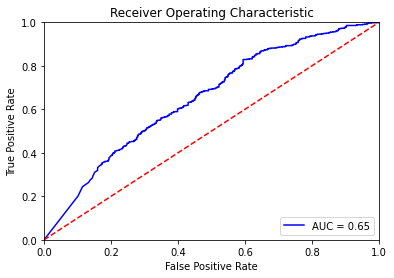

In [12]:
#predict with test data
y_pred=chosen_model.predict(X_test)

#Confusion Matrix
import sklearn
confusion_matrix_census=sklearn.metrics.confusion_matrix(y_test, y_pred, labels=None, sample_weight=None, normalize=None)
tn, fp, fn, tp = confusion_matrix_census.ravel()
print(confusion_matrix_census)

#Precision and Recall
precision=tp/(tp+fp)
recall=tp/(tp+fn)
print('Precision is ',precision,' , Recall is ',recall)

#f1 score

f1_score_cen=sklearn.metrics.f1_score(y_test, y_pred,average='binary')
f1_score_cal=2*precision*recall/(precision+recall)
print('built-in f1 score is ',f1_score_cen)
print('calculated f1 score is ',f1_score_cal)

#Accuracy score and AUC score
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score

accuracy_chosen=accuracy_score(y_test, y_pred)
print('Accuracy score is ',accuracy_chosen)

y_pred_prob = chosen_model.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_prob)
roc_auc = metrics.auc(fpr, tpr)
print('AUC score is ',roc_auc)


#ROC
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()